 # Use case: Fraud Binary Classification

Helping the compliance team to identify fraudulent behaviour by predicting if a transaction is fraudulent using classification.

Content

1. Introduction

2. Used libraries

3. Reading Clean Data from a CSV File

4. Case of study and data understanding

    [4.1] Hypothesis
    

5. Transforming variables

    [5.1] Categorical variables

        [5.1.1] Category

        [5.1.2] Gender

        [5.1.3] city

        [5.1.4] state

        [5.1.5] job

        [5.1.6] zip code

    [5.2] Merchant analysis

    [5.3] Feature engineering

        [5.3.1] Getting year and month

        [5.3.2] Getting the day of the week

        [5.3.3] Getting hour of the transaction

        [5.3.4] Getting the type of purchase

        [5.3.5] Decrease in coordinate precision – client

        [5.3.6] Age by groups

    [5.4] Ordinal encoder

    [5.5] Geo-location features

    [5.6] Delete columns

    [5.7] Saving the data
    

6. Split the data

    [6.1] Reading clean data

    [6.2] Split data

    [6.3] Split train and validation

    [6.4] Count classes


7. Assess Baseline Model

    [7.1] base model

    [7.2] confusion matrix

    [7.3] Count classes
    

8. Training a model

    [8.1] Decision Tree Classifier

    [8.2] Decision Tree Classifier with different min_samples_split

    [8.3] Decision Tree Classifier with different max_depth

    [8.4] Decision Tree Classifier with different max_depth and min_samples_split

    [8.5] Random Forest Classifier

    [8.6] Random Forest Classifier with max_features

    [8.7] Extra trees Classifier

    [8.8] Decision Tree Classifier with Grid Search

    [8.9] Default XGBoost Classifier

    [8.10] XGBoost Classifier with scale_pos_weight

    [8.11] XGBoost Classifier with grid search for scale_pos_weight	

    [8.12] XGBoost Classifier with random search

    [8.13] Default XGBoost Classifier with different variables

    [8.14] Grid search k value with SMOTE for imbalanced classification

    [8.15] XGBoost Classifier with Grid Search and SMOTE   

    
9. Conclusion

10. References

## 1. Introduction

In the following study, we will fit a binary classification model using Decision tree,  random forest and extra trees and XGbosots classifiers to predict if a transaction is a fraud or not as accurate as possible.

## 2. Used libraries 

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from datetime import datetime
from statistics import mode
from math import radians, sin, cos, sqrt
from collections import Counter
from scipy.stats import randint
from scipy.stats import uniform
from numpy import mean
from array import array

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
#!pip install xgboost
#!pip install imbalanced-learn

## 3. Reading Data from a CSV File

transactional data:

In [6]:
df = pd.read_csv("txn_df.csv")

In [7]:
df.shape

(4260904, 19)

In [8]:
df

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,gender,city,state,zip,lat,long,city_pop,job,age
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500,2022-09-06 02:24:36,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834,2022-10-15 09:34:44,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700,2022-09-04 12:00:53,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976,2022-12-09 04:53:44,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0


In [9]:
df.describe()

,cc_num,acct_num,amt,is_fraud,merch_lat,merch_long,zip,lat,long,city_pop,age
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,3.916811e+17,4.913599e+11,6.898790e+01,1.181439e-03,3.735276e+01,-9.247610e+01,5.190384e+04,3.735269e+01,-9.247593e+01,3.038011e+05,4.486595e+01
std,1.267805e+18,2.897749e+11,1.618467e+02,3.435177e-02,5.504630e+00,1.741603e+01,2.996720e+04,5.474364e+00,1.740613e+01,5.696231e+05,1.766078e+01
min,6.040027e+10,2.348758e+09,1.000000e+00,0.000000e+00,1.859001e+01,-1.603677e+02,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.500000e+01
25%,1.800618e+14,2.568452e+11,9.100000e+00,0.000000e+00,3.370138e+01,-9.903072e+01,2.750500e+04,3.378360e+01,-9.868950e+01,2.010300e+04,3.000000e+01
50%,3.524238e+15,4.719310e+11,4.449000e+01,0.000000e+00,3.819365e+01,-8.727445e+01,4.920200e+04,3.824200e+01,-8.717940e+01,6.759300e+04,4.300000e+01
75%,4.604409e+15,7.518511e+11,8.158000e+01,0.000000e+00,4.120567e+01,-7.966098e+01,7.870400e+04,4.098200e+01,-7.994400e+01,2.420370e+05,5.600000e+01
max,4.986227e+18,9.993899e+11,4.130053e+04,1.000000e+00,6.577610e+01,-6.724632e+01,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,9.500000e+01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   acct_num    int64  
 2   trans_num   object 
 3   category    object 
 4   amt         float64
 5   is_fraud    int64  
 6   merchant    object 
 7   merch_lat   float64
 8   merch_long  float64
 9   timestamp   object 
 10  gender      object 
 11  city        object 
 12  state       object 
 13  zip         int64  
 14  lat         float64
 15  long        float64
 16  city_pop    int64  
 17  job         object 
 18  age         float64
dtypes: float64(6), int64(5), object(8)
memory usage: 617.7+ MB


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
We will train several models based on decision trees, random forests, extra trees, and XGboost classifiers to predict if a transaction is a fraud. We assume that decision trees-based algorithms will perform better based on this dataset's predominant categorical features.

## 5. Transforming variables

In [11]:
df_cleaned = df.copy()

**[5.1]** Categorical variables

based on (Brownlee, 2020f) and (Saxena, 2020)

**[5.1.1]** Category:

In [13]:
df_cleaned['category'].unique()

array(['gas_transport', 'grocery_pos', 'misc_net', 'misc_pos',
       'entertainment', 'food_dining', 'shopping_pos', 'shopping_net',
       'grocery_net', 'personal_care', 'health_fitness', 'travel', 'home',
       'kids_pets'], dtype=object)

In [14]:
#one hot encoding for category feature
df_cat = pd.get_dummies(df_cleaned["category"], drop_first=False)

#join the one hot encoding in the clean dataset
df_cleaned = pd.concat([df_cleaned, df_cat], axis=1)

**[5.1.2]** Gender:

In [15]:
df_cleaned['gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
#one hot encoding for category feature
df_cat = pd.get_dummies(df_cleaned["gender"], drop_first=False)

#join the one hot encoding in the clean dataset
df_cleaned = pd.concat([df_cleaned, df_cat], axis=1)

**[5.1.3]** city:

In [17]:
df_cleaned['city'].nunique()

726

In [18]:
counts_df = df_cleaned.groupby('city')['trans_num'].nunique()
counts_df = counts_df.to_frame()

In [19]:
#sort DataFrame by count descending
counts_df = counts_df.sort_values(by='trans_num', ascending=False)

#add column to display cumulative percentage
counts_df['cumperc'] = counts_df['trans_num'].cumsum()/counts_df['trans_num'].sum()*100

In [20]:
# 80% cumulative percentage of the values
counts_df[counts_df['cumperc']<= 80]

,trans_num,cumperc
city,,
Brooklyn,74282,1.743339
Denver,37474,2.622824
Austin,35307,3.451451
Houston,33889,4.246798
Dallas,33466,5.032219
...,...,...
Westchester,4708,79.584637
Inglewood,4392,79.687714
Beebe,4391,79.790767


391 cities represent the 80% most common cities

In [22]:
#city-transaction count distribution
df_city = df_cleaned[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']

#city-fraud distribution
df_fraud_city = df_cleaned[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']

df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')

df_fraud_city['city_fraud_percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100

#top 5 cities with fraudulent transactions
df_fraud_city[df_fraud_city['is_fraud'] == 1].sort_values(by = ['city_fraud_percentage'], ascending=False).head(5)

,city,is_fraud,Transaction count,city_count,city_fraud_percentage
759,Pensacola,1,9,9,100.0
979,Tallahassee,1,21,21,100.0
812,Radcliff,1,12,12,100.0
682,New Britain,1,7,7,100.0
578,Macomb,1,12,12,100.0


In [23]:
percentage = df_fraud_city[df_fraud_city['is_fraud'] == 1][["city","city_fraud_percentage"]]

In [24]:
df_cleaned=pd.merge(df_cleaned,percentage, left_on='city', right_on='city', how='left')

In [25]:
df_cleaned['city_fraud_percentage'] = df_cleaned['city_fraud_percentage'].fillna(0)

**[5.1.4]** state:

In [27]:
#number of unique values
df_cleaned['state'].nunique()

51

In [28]:
counts_df = df_cleaned.groupby('state')['trans_num'].nunique()
counts_df = counts_df.to_frame()

In [29]:
#sort DataFrame by count descending
counts_df = counts_df.sort_values(by='trans_num', ascending=False)

#add column to display cumulative percentage
counts_df['cumperc'] = counts_df['trans_num'].cumsum()/counts_df['trans_num'].sum()*100


In [30]:
counts_df[counts_df['cumperc']<= 80]

,trans_num,cumperc
state,,
CA,505426,11.861943
TX,379828,20.776201
NY,262841,26.944869
FL,241062,32.602401
PA,204570,37.403495
MI,186244,41.774492
IL,177966,45.951211
NJ,157268,49.642165
NC,143720,53.015158


In [31]:
#one hot encoding for category feature
df_cat = pd.get_dummies(df_cleaned["state"], drop_first=False)

#join the one hot encoding in the clean dataset
df_cleaned = pd.concat([df_cleaned, df_cat], axis=1)

**[5.1.5]** job:

In [32]:
df_cleaned['job'].nunique()

505

In [33]:
counts_df = df_cleaned.groupby('job')['trans_num'].nunique()
counts_df = counts_df.to_frame()

In [34]:
#sort DataFrame descending
counts_df = counts_df.sort_values(by='trans_num', ascending=False)

counts_df['cumperc'] = counts_df['trans_num'].cumsum()/counts_df['trans_num'].sum()*100


In [35]:
counts_df[counts_df['cumperc']<= 80]

,trans_num,cumperc
job,,
Computer games developer,33859,0.794644
Radio producer,28746,1.469289
Patent attorney,27990,2.126192
"Teacher, adult education",27692,2.776101
General practice doctor,27279,3.416317
...,...,...
Applications developer,6901,79.309954
"Conservator, furniture",6892,79.471704
"Radiographer, diagnostic",6885,79.633289


Getting Job_fraud_percentage based on the transactions history:

In [36]:
#counts
df_job = df_cleaned[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']

#fraud distribution
df_fraud_job = df_cleaned[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Job_fraud_percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100

#fraudulent transactions
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Job_fraud_percentage'], ascending=False).head(5)

,job,is_fraud,Transaction count,job_count,Job_fraud_percentage
369,"Geneticist, molecular",1,12,12,100.000000
671,Sales executive,1,7,7,100.000000
466,"Loss adjuster, chartered",1,7,7,100.000000
327,Estate manager/land agent,1,18,376,4.787234
807,Transport planner,1,11,369,2.981030


In [37]:
percentage = df_fraud_job[df_fraud_job['is_fraud'] == 1][["job","Job_fraud_percentage"]]

In [38]:
df_cleaned=pd.merge(df_cleaned,percentage, left_on='job', right_on='job', how='left')

In [39]:
df_cleaned['Job_fraud_percentage'] = df_cleaned['Job_fraud_percentage'].fillna(0)

**[5.1.6]** zip code:

In [40]:
df_cleaned['zip'].nunique()

939

In [41]:
#counts
df_zip = df_cleaned[['zip','trans_num']].groupby(['zip']).count().reset_index()
df_zip.columns = ['zip', 'zip_count']

#fraud distribution
df_fraud_zip = df_cleaned[['zip', 'trans_num', 'is_fraud']].groupby(['zip','is_fraud']).count().reset_index()
df_fraud_zip.columns = ['zip', 'is_fraud', 'Transaction count']

df_fraud_zip = df_fraud_zip.merge(df_zip[['zip', 'zip_count']], how='inner', on='zip')

df_fraud_zip['zip_fraud_percentage'] = (df_fraud_zip['Transaction count']/df_fraud_zip['zip_count'])*100

#fraudulent transactions
df_fraud_zip[df_fraud_zip['is_fraud'] == 1].sort_values(by = ['zip_fraud_percentage'], ascending=False).head(5)

,zip,is_fraud,Transaction count,zip_count,zip_fraud_percentage
209,16143,1,10,10,100.0
441,32504,1,9,9,100.0
634,48044,1,12,12,100.0
860,68154,1,9,9,100.0
615,46814,1,7,7,100.0


In [42]:
percentage = df_fraud_zip[df_fraud_zip['is_fraud'] == 1][["zip","zip_fraud_percentage"]]

In [43]:
df_cleaned=pd.merge(df_cleaned,percentage, left_on='zip', right_on='zip', how='left')

In [44]:
df_cleaned['zip_fraud_percentage'] = df_cleaned['zip_fraud_percentage'].fillna(0)

**[5.2]** Merchant analysis

The number of merchants involved in fraud is similar to the total rows with fraud cases. It might indicate this is not a critical variable to discover fraud.

In [45]:
#unique merchant values in total
df_cleaned['merchant'].nunique()

21977

In [46]:
#unique merchant values for fraud
df_cleaned[df_cleaned["is_fraud"]==1]['merchant'].nunique()

3904

In [47]:
#total fraud rows
df_cleaned['is_fraud'].value_counts()

0    4255870
1       5034
Name: is_fraud, dtype: int64

**[5.3]** Feature engineering

**[5.3.1]** Getting year and month:

In [48]:
df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['timestamp']).year
df_cleaned['month'] = pd.DatetimeIndex(df_cleaned['timestamp']).month

**[5.3.2]**  Getting the day of the week:

In [49]:
df_cleaned['weekday'] = pd.DatetimeIndex(df_cleaned['timestamp']).weekday

**[5.3.3]**  Getting hour of the transaction:

In [50]:
df_cleaned['hour'] = pd.DatetimeIndex(df_cleaned['timestamp']).hour

**[5.3.4]**  Getting the type of purchase:

In [51]:
df_cleaned['category_type'] = df_cleaned['category'].replace(['grocery_pos', 'misc_net', 'misc_pos', 'shopping_pos', 'shopping_net', 'grocery_net'], ['pos', 'net', 'pos', 'pos', 'net', 'net'])

In [52]:
df_cleaned['category_type'] = df_cleaned['category_type'].replace(['gas_transport', 'entertainment', 'food_dining', 'personal_care', 'health_fitness', 'travel', 'home', 'kids_pets'], ['other', 'other', 'other', 'other', 'other', 'other','other','other'])

In [53]:
df_cleaned['category_type'].unique()

array(['other', 'pos', 'net'], dtype=object)

In [54]:
#one hot encoding for category type feature
df_cat = pd.get_dummies(df_cleaned["category_type"], drop_first=False)

#join the one hot encoding in the clean dataset
df_cleaned = pd.concat([df_cleaned, df_cat], axis=1)

**[5.3.5]**  Decrease in coordinate precision - client

The precision of the coordinates is decreased by rounding to its integer value to obtain a broader geographic area and reduce the number of categories of the variable. (Hmong.wiki, 2023)

In [55]:
df_cleaned["lat_2"] = df_cleaned["lat"].round(0)

In [56]:
df_cleaned["long_2"] = df_cleaned["long"].round(0)

**[5.3.6]**  Age by groups

In [57]:
df_cleaned["age_bin"] = df_cleaned["age"].copy()

In [58]:
#groupd definition

for i in range(len(df_cleaned.age)):
    if df_cleaned.age[i] <= 30:
        df_cleaned.age_bin[i] = '< 30'
    elif df_cleaned.age[i] > 30 and df_cleaned.age[i] <= 45:
        df_cleaned.age_bin[i] = '30-45'
    elif df.age[i] > 45 and df_cleaned.age[i] <= 60:
        df_cleaned.age_bin[i] = '46-60'
    elif df.age[i] > 60 and df_cleaned.age[i] <= 75:
        df_cleaned.age_bin[i] = '61-75'
    else:
        df_cleaned.age_bin[i] = '> 75'
    

df_cleaned.age_bin.head()

0    61-75
1    61-75
2    61-75
3    61-75
4    61-75
Name: age_bin, dtype: object

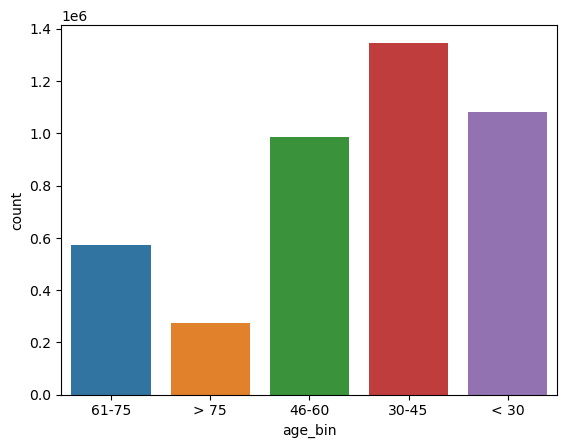

In [59]:
#plotting the age feature in the data
plot = sns.countplot(df_cleaned.age_bin)

plt.show()

In [60]:
df_cleaned["age_bin"]

0          61-75
1          61-75
2          61-75
3          61-75
4          61-75
           ...  
4260899    61-75
4260900    61-75
4260901    61-75
4260902    61-75
4260903    61-75
Name: age_bin, Length: 4260904, dtype: object

In [61]:
#one hot encoding for category type feature
df_cat = pd.get_dummies(df_cleaned["age_bin"], drop_first=False)

#join the one hot encoding in the clean dataset
df_cleaned = pd.concat([df_cleaned, df_cat], axis=1)

**[5.4]** Ordinal encoder

based on (Brownlee, 2020f) and (Saxena, 2020)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()
enc.fit(df_cleaned[["category","merchant", "gender", "city", "state", "zip", "job", "age_bin"]])
df_cleaned[["category_oe","merchant_oe", "gender_oe", "city_oe", "state_oe", "zip_oe", "job_oe", "age_bin_oe"]] = enc.transform(df_cleaned[["category","merchant", "gender", "city", "state", "zip", "job", "age_bin"]])

In [16]:
enc.categories_

[array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object),
 array(['Abbott Group', 'Abbott LLC', 'Abbott Ltd', ...,
        'Zuniga, Castillo and Pacheco', 'Zuniga, Conley and Shepherd',
        'Zuniga, Hernandez and Berger'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Abbottstown', 'Abilene', 'Acton', 'Ada', 'Adairville', 'Aiken',
        'Albany', 'Albuquerque', 'Alexandria', 'Alma', 'Alton', 'Altoona',
        'Alturas', 'Alva', 'Ambler', 'Amherst', 'Anchorage', 'Andalusia',
        'Andover', 'Andrews', 'Ankeny', 'Ann Arbor', 'Annapolis',
        'Arcadia', 'Arroyo Grande', 'Arverne', 'Ashland', 'Astoria',
        'Athens', 'Atlanta', 'Aurora', 'Austin', 'Avondale', 'Bainbridge',
        'Bainbridge Island', 'Bakersfield', 'Ball', 'Ballston Spa',
        'Bancroft', 'Bangor', 'Ba

**[5.5]** Geo-location features

Getting the distance between the customer and the store.

In [9]:
from math import radians, sin, cos, sqrt

In [10]:
# Geo-location features: Distance of merchant from customer stored in variable dist_from_customer_km
 
# Convert degrees to radians
df_cleaned['merch_lat_rad'] = df_cleaned['merch_lat'].apply(radians)
df_cleaned['merch_long_rad'] = df_cleaned['merch_long'].apply(radians)
df_cleaned['customer_lat_rad'] = df_cleaned['lat'].apply(radians)
df_cleaned['customer_long_rad'] = df_cleaned['long'].apply(radians)
 
# Calculate the distance using the Haversine formula
R = 6371  # Radius of the Earth in kilometers
df_cleaned['dist_from_customer_km'] = df_cleaned.apply(lambda row: 2 * R * sqrt(
    sin((row['customer_lat_rad'] - row['merch_lat_rad']) / 2) ** 2 +
    cos(row['merch_lat_rad']) * cos(row['customer_lat_rad']) *
    sin((row['customer_long_rad'] - row['merch_long_rad']) / 2) ** 2
), axis=1)
 
# dropping radians columns as it is not needed
df_cleaned.drop(['merch_lat_rad','merch_long_rad', 'customer_lat_rad','customer_long_rad'], axis=1, inplace=True)

**[5.6]** Delete columns

The column ID is not going to be used to train the model.

In [62]:
#df_cleaned.drop(df_cleaned.columns[2], axis=1, inplace=True)

**[5.7]** Saving the data:

Saving the cleaning and feature extraction process.

In [12]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

## 6. Split the data 

**[6.1]** Reading clean data:

In [5]:
df_cleaned = pd.read_csv("df_cleaned.csv")

In [6]:
df_cleaned.shape

(4260904, 113)

In [43]:
df_cleaned

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,...,> 75,category_oe,merchant_oe,gender_oe,city_oe,state_oe,zip_oe,job_oe,age_bin_oe,dist_from_customer_km
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,...,0,2.0,15205.0,1.0,14.0,38.0,159.0,5.0,2.0,83.015683
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,...,0,4.0,19705.0,1.0,14.0,38.0,159.0,5.0,2.0,84.478296
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,...,0,8.0,4778.0,1.0,14.0,38.0,159.0,5.0,2.0,121.818619
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,...,0,4.0,10615.0,1.0,14.0,38.0,159.0,5.0,2.0,76.800389
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,...,0,2.0,7171.0,1.0,14.0,38.0,159.0,5.0,2.0,85.734079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500,2022-09-06 02:24:36,...,0,5.0,456.0,0.0,651.0,4.0,840.0,491.0,2.0,59.910840
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834,2022-10-15 09:34:44,...,0,6.0,19896.0,0.0,651.0,4.0,840.0,491.0,2.0,81.018112
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700,2022-09-04 12:00:53,...,0,5.0,9098.0,0.0,651.0,4.0,840.0,491.0,2.0,108.715122
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976,2022-12-09 04:53:44,...,0,10.0,3060.0,0.0,651.0,4.0,840.0,491.0,2.0,28.650067


**[6.2]** Split data

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
print(df_cleaned.columns.tolist())

['cc_num', 'acct_num', 'trans_num', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'age', 'entertainment', 'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M', 'city_fraud_percentage', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Job_fraud_percentage', 'zip_fraud_percentage', 'year', 'month', 'weekday', 'hour', 'category_type', 'net', 'other', 'pos', 'lat_2', 'long_2', 'age_bin', '30-45', '46-60', '61-75', '< 30', '> 75', 'category_oe', 'merchant_oe', 'gender_oe', 'city_oe', 'state_oe', '

In [46]:
X = df_cleaned[['cc_num', 'acct_num', 'amt',
                'city_pop', 'entertainment', 'food_dining', 'gas_transport',
                'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
                'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M',
                'city_fraud_percentage', 'Job_fraud_percentage',
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos',
                'merchant_oe', 'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe', 
                'dist_from_customer_km']].values
y = df_cleaned['is_fraud'].values

In [47]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
X_data.shape

(3408723, 36)

In [49]:
y_data.shape

(3408723,)

In [50]:
X_test.shape

(852181, 36)

In [51]:
y_test.shape

(852181,)

**[6.3]** Split train and validation

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [53]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2726978, 36)
(681745, 36)
(852181, 36)
(2726978,)
(681745,)
(852181,)


**[6.4]** Count classes

In [54]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2723705,    3273], dtype=int64))

In [55]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([680991,    754], dtype=int64))

In [56]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([851174,   1007], dtype=int64))

The count per label indicates that we are preserving the class distribution with 0.12% values class 1 over class 0.

## 7. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021), (Olugbenga, 2022) and (H2O Driverless, 2023). 

We want the prediction of fraud to be as correct as possible and avoid false negative predictions (type II error) where the company can lose potential frauds. Moreover, we will prevent excessive type I error by predicting false potential frauds.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[7.1]** base model

In [268]:
from statistics import mode

In [269]:
y_mode = mode(y_train)
y_mode

0

In [270]:
y_train.shape

(2726978,)

In [271]:
y_base = np.full(y_train.shape, y_mode)

In [272]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [273]:
y_base.shape

(2726978,)

In [274]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [275]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9987997702951765
0.9982000157968547
0.0
0.0
0.0012002297048234346
0.0


**[7.2]** confusion matrix

In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
results = confusion_matrix(y_train, y_base)
print(results)

[[2723705       0]
 [   3273       0]]


**[7.3]** Count classes

In [278]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2723705,    3273], dtype=int64))

## 8. Training a model

Based on: (So, 2023), (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c).

Note: We will not use data standardisation since algorithms based on decision trees are invariant according to the scale of the data and do not use distance metrics for the learning process (Filho, 2023).

**[8.1]** Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [259]:
tree_default = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [260]:
tree_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [261]:
y_train_preds = tree_default.predict(X_train)

In [263]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [264]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)

[[2723705       0]
 [      0    3273]]


In [265]:
#score for the validation set
y_val_preds = tree_default.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.998792803760937
0.9987971699059156
0.4549019607843137
0.46153846153846156
0.2105502817181714
0.4601957154192013


In [266]:
#score for the test set
y_test_preds = tree_default.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9987573062530143
0.9987286115296864
0.47167755991285404
0.4299900695134062
0.20349023260182
0.4377274565305298


**[8.2]** Decision Tree Classifier with different min_samples_split

In [267]:
min_samples_split_values = [i for i in (2, 3, 5, 10, 20)]
scores = []

for m in min_samples_split_values:
    tree = DecisionTreeClassifier(random_state=42,  min_samples_split= m, class_weight='balanced')
    tree.fit(X_train, y_train)
    y_train_preds = tree.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

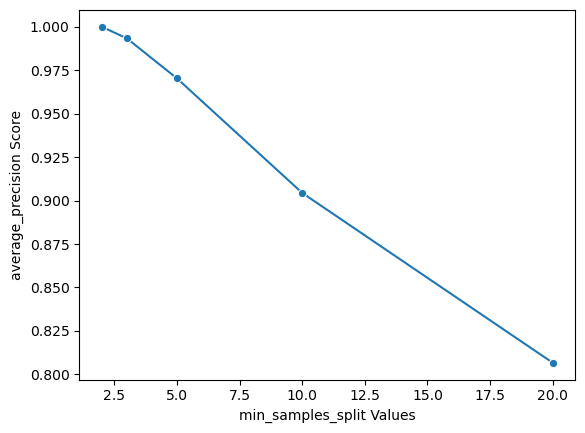

In [268]:
sns.lineplot(x = min_samples_split_values, y = scores, marker = 'o')
plt.xlabel("min_samples_split Values")
plt.ylabel("average_precision Score")

In [269]:
scores

[1.0,
 0.9933232169954477,
 0.9702952685876912,
 0.904393478861564,
 0.8066742248730714]

In [270]:
best_index = np.argmax(scores)
best_min_samples_split_values = min_samples_split_values[best_index]

best_min_samples_split_values

2

The best min_samples_split_value is equal to the default

**[8.3]** Decision Tree Classifier with different max_depth

In [279]:
max_depth_values = [i for i in (55, 60, 65)]
scores = []

for m in max_depth_values:
    tree = DecisionTreeClassifier(random_state=42,  max_depth= m, class_weight='balanced')
    tree.fit(X_train, y_train)
    y_train_preds = tree.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

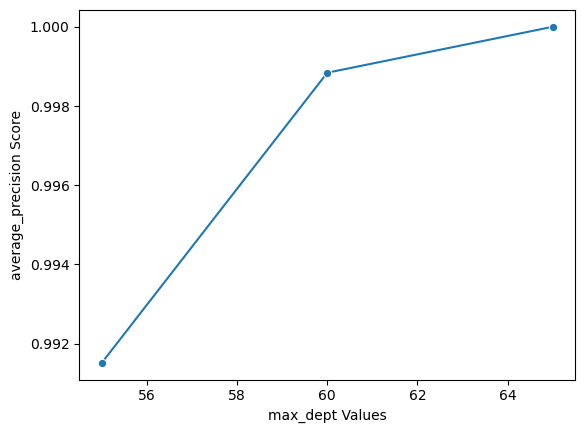

In [280]:
sns.lineplot(x = max_depth_values, y = scores, marker = 'o')
plt.xlabel("max_dept Values")
plt.ylabel("average_precision Score")

In [281]:
scores

[0.9915177219024538, 0.9988403320312499, 1.0]

In [282]:
best_index = np.argmax(scores)
best_max_depth_values = max_depth_values[best_index]

best_max_depth_values

65

**[8.4]** Decision Tree Classifier with different max_depth and min_samples_split

In [283]:
tree_2 = DecisionTreeClassifier(random_state=42, max_depth=60 , min_samples_split=2 ,class_weight='balanced')

In [284]:
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=60, random_state=42)

In [285]:
y_train_preds = tree_2.predict(X_train)

In [286]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9999930325803875
0.9999930426505652
0.994228432563791
1.0
0.994228432563791
0.9988403320312499


In [287]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)

[[2723686      19]
 [      0    3273]]


In [288]:
#score for the validation set
y_val_preds = tree_2.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9987840028163023
0.9987923439781847
0.45161290322580644
0.46419098143236076
0.21022723371464294
0.4616196254286468


In [290]:
#score for the test set
y_test_preds = tree_2.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9987620000915298
0.9987367569830569
0.47413793103448276
0.4369414101290963
0.20783584779147501
0.4439063761097659


Analysing feature importance in the model

In [292]:
tree_2.feature_importances_

array([2.32197843e-02, 1.87256277e-02, 7.36475290e-01, 1.76662379e-02,
       1.71647202e-02, 8.06707144e-03, 2.10557075e-02, 3.43197083e-02,
       1.98818213e-03, 1.68978953e-02, 7.34248342e-04, 1.23529963e-02,
       2.28604140e-04, 2.66987766e-03, 9.09174083e-04, 1.99534588e-03,
       2.36465530e-03, 8.58607992e-04, 6.97736276e-03, 5.03944647e-04,
       6.64496946e-04, 1.10589734e-02, 2.45375274e-02, 1.90880710e-02,
       4.12562186e-03, 2.93708175e-03, 2.97128063e-03, 9.44190489e-03])

In [294]:
X = df_cleaned[['cc_num', 'acct_num', 'amt', 'merch_lat', 'merch_long',
       'zip', 'city_pop', 'age', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'M', 'month',
       'other', 'pos', 'lat_2', 'long_2', 'weekday']]

In [295]:
#dataframe with the values
feat_imp_tree_2 = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': tree_2.feature_importances_
     }
)

In [296]:
feat_imp_tree_2 = feat_imp_tree_2.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_tree_2

,feature,feature_importance
0,amt,0.736475
1,age,0.034320
2,month,0.024538
3,cc_num,0.023220
4,city_pop,0.021056
5,other,0.019088
6,acct_num,0.018726
7,merch_lat,0.017666
8,merch_long,0.017165
9,gas_transport,0.016898


**[8.5]** Random Forest Classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [299]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [300]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [301]:
y_train_preds = rf.predict(X_train)

In [302]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9999996332937046
0.999999633265724
1.0
0.9996944699052857
0.9996948366115811
0.9997555609875336


In [303]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9992915239569047
0.9991327316827592
0.9721254355400697
0.37002652519893897
0.36040893842064614
0.4223433242506812


In [304]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9991985270734738
0.9990029052287025
0.9682080924855492
0.3326713008937438
0.32288361053362635
0.3829446730681298


**[8.6]** Random Forest Classifier with max_features

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score

In [97]:
max_features_values = [i for i in (2,4,6)]
scores = []

for m in max_features_values:
    rf = RandomForestClassifier(random_state=42, n_estimators= 40, max_depth = 60, min_samples_leaf= 1, max_features = m, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

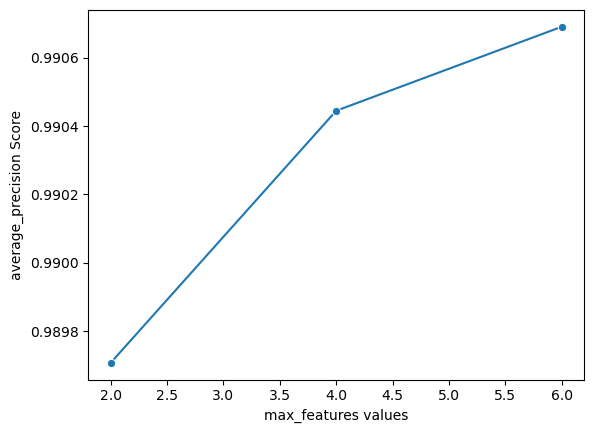

In [98]:
sns.lineplot(x = max_features_values, y = scores, marker = 'o')
plt.xlabel("max_features values")
plt.ylabel("average_precision Score")

In [99]:
scores

[0.9897077743061937, 0.9904446894524073, 0.990690267654805]

In [100]:
best_index = np.argmax(scores)
best_max_features_values = max_features_values[best_index]

best_max_features_values

6

In [101]:
rf = RandomForestClassifier(random_state=42, n_estimators= 40, max_depth = 60, min_samples_leaf= 1, max_features = best_max_features_values, class_weight='balanced')

In [102]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=60, max_features=6,
                       n_estimators=40, random_state=42)

In [103]:
y_train_preds = rf.predict(X_train)

In [104]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.999986065160775
0.9999860245268419
1.0
0.9883898564008555
0.9884037912400805
0.990690267654805


In [106]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9992856566604815
0.9991324116579134
0.9435215946843853
0.376657824933687
0.35607419896150444
0.42809767862526377


In [108]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9991914863157005
0.9990029067682404
0.9344262295081968
0.33962264150943394
0.3181326550144807
0.38916704597177976


**[8.7]** Extra trees Classifier

In [282]:
from sklearn.ensemble import ExtraTreesClassifier

In [306]:
et = ExtraTreesClassifier(random_state=42, class_weight='balanced')

In [307]:
et.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', random_state=42)

In [308]:
y_train_preds = et.predict(X_train)

In [309]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [310]:
#score for the validation set
y_val_preds = et.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9993443296247131
0.9992123848526809
0.9781931464174455
0.41644562334217505
0.40800965721540305
0.4704824692837878


In [311]:
#score for the test set
y_test_preds = et.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9992642408126912
0.9991166504117975
0.9418604651162791
0.40218470705064546
0.37950829794196217
0.4542395693135936


**[8.8]** Decision Tree Classifier with Grid Search

based on: (Brownlee, 2020c)

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [166]:
hyperparams_grid = {
    'max_depth': np.arange(60, 66,5),
    'min_samples_split': np.arange(2, 6, 3),
    'min_samples_leaf': np.arange(2, 8, 5)
    }
hyperparams_grid

{'max_depth': array([60, 65]),
 'min_samples_split': array([2, 5]),
 'min_samples_leaf': array([2, 7])}

In [167]:
#instantiate the RandomForestClassifier 
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [168]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [169]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Note: 
* shuffle = True, the data is shuffled by your random_state. Otherwise, the data is shuffled by np.random (as default)

* For imbalanced classification, we will use stratified k-fold cross-validation that enforces the class distribution in each data split, preserving the original dataset's distribution. (Brownlee, 2020)

In [170]:
#Instantiate a GridSearchCV
grid_search_dt = GridSearchCV(dt, hyperparams_grid, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

* verbosity: 
1 : the computation time for each fold and parameter candidate is displayed
2 : the score is also displayed

* cv: number of fold cross validation

* return_train_score = True, the cv_results_ attribute will include training scores to get insights on how parameter impact the overfitting

* n_jobs: -1 means using all processors. 1 as default means 1 job in parallel.

* scoring: metric to evaluate the performance of the cross-validated model. Here we are defining a custom metric F2Beta 

Based on: (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c), (scikit-learn developers, 2023d)

In [171]:
#Fit the GridSearchCV on the training set
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([60, 65]),
                         'min_samples_leaf': array([2, 7]),
                         'min_samples_split': array([2, 5])},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
             verbose=2)

In [172]:
grid_search_dt.best_params_

{'max_depth': 60, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [173]:
print(grid_search_dt.score(X_train, y_train))
print(grid_search_dt.score(X_val, y_val))
print(grid_search_dt.score(X_test, y_test))

0.6280462063936754
0.3095199612089866
0.28311362209667296


**[8.9]** Default XGBoost Classifier

Based on: (Brownlee, 2021) and (xgboost developers, 2022). 

In [284]:
import xgboost as xgb

In [204]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [205]:
y_train_preds = xgb_model.predict(X_train)

In [206]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9994796437668364
0.999417503629058
0.9611940298507463
0.5902841429880843
0.5678693472978338
0.6396503774334524


In [208]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994030025889445
0.9993210686616768
0.9044289044289044
0.5145888594164456
0.46594589597605357
0.5631349782293179


In [209]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9992853630860111
0.9991633492329899
0.902834008097166
0.4428997020854022
0.40052322407060703
0.4931446262715613


**[8.10]** XGBoost Classifier with scale_pos_weight

"The scale_pos_weight value is used to scale the gradient for the positive class". (Brownlee, 2020e)

In [285]:
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [66]:
#estimate scale pos weight value

# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 832.174


In [57]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, scale_pos_weight=832)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [58]:
y_train_preds = xgb_model.predict(X_train)

In [62]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9878953918953508
0.9929091955747358
0.0902100214982636
1.0
0.0902100214982636
0.3314497508810305


In [63]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9875994690096737
0.9928056279837151
0.07335992907801418
0.8779840848806366
0.06454379801620112
0.2749169435215947


In [64]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9875026549524103
0.9926993134556048
0.07739503900429485
0.8768619662363456
0.06801027507222597
0.28600116602966896


**[8.11]** XGBoost Classifier with grid search for scale_pos_weight

Based on: (scikit-learn developers, 2023c)

In [286]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [66]:
# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 832.174


In [67]:
# define grid
weights = [1, 10, 50, 832, 1200]
param_grid = dict(scale_pos_weight=weights)

In [68]:
model = XGBClassifier(objective="binary:logistic")

In [69]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [70]:
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)

In [71]:
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f2_scorer)

In [72]:
# execute the grid search
grid_result = grid.fit(X_train, y_train)

In [73]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.600076 using {'scale_pos_weight': 10}


In [74]:
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.477468 (0.012815) with: {'scale_pos_weight': 1}
0.600076 (0.016339) with: {'scale_pos_weight': 10}
0.567014 (0.011704) with: {'scale_pos_weight': 50}
0.356736 (0.014840) with: {'scale_pos_weight': 832}
0.342348 (0.012752) with: {'scale_pos_weight': 1200}


**[8.12]** XGBoost Classifier with random search

In [61]:
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
hyperparams_dist = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
    }
hyperparams_dist

{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x120a08d35e0>,
 'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x120a10d5130>,
 'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x120a10e5100>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x120a10d52b0>,
 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x120a10e57f0>,
 'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x120a10df280>}

In [63]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [64]:
#instantiate the Classifier 
model = XGBClassifier(objective="binary:logistic")

In [65]:
#Instantiate a KFold 
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)

In [66]:
#Instantiate a GridSearchCV
random_search = RandomizedSearchCV(model, hyperparams_dist, cv=cv, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

In [67]:
#Fit the random Search on the training set
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           i...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000120A10D52B0>,
                                        'n_

In [68]:
random_search.best_params_

{'colsample_bytree': 0.818698050035146,
 'gamma': 0.1336647470095445,
 'learning_rate': 0.27968679129212826,
 'max_depth': 3,
 'n_estimators': 132,
 'subsample': 0.8343691639112242}

In [69]:
print(random_search.score(X_train, y_train))
print(random_search.score(X_val, y_val))
print(random_search.score(X_test, y_test))

0.5863645398529119
0.5659293306521115
0.5419466724474312


Analysing feature importance in the model

In [73]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([0.0079376 , 0.00714561, 0.0935382 , 0.00414696, 0.0089607 ,
       0.01669862, 0.02852396, 0.00910265, 0.0723763 , 0.01496258,
       0.01047682, 0.        , 0.02542629, 0.03424619, 0.06769527,
       0.03083702, 0.00962043, 0.03263253, 0.01693901, 0.022358  ,
       0.02385899, 0.00976133, 0.08118751, 0.03275342, 0.00847292,
       0.08956137, 0.11422952, 0.06912413, 0.01248442, 0.0039301 ,
       0.00676699, 0.00486565, 0.00365909, 0.00641733, 0.01540881,
       0.00389352], dtype=float32)

In [74]:
X = df_cleaned[['cc_num', 'acct_num', 'amt',
                'city_pop', 'entertainment', 'food_dining', 'gas_transport',
                'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
                'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M',
                'city_fraud_percentage', 'Job_fraud_percentage',
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos',
                'merchant_oe', 'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe', 
                'dist_from_customer_km']]

In [75]:
#dataframe with the values
feat_imp = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': feature_importances
     }
)

In [76]:
feat_imp = feat_imp.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp

,feature,feature_importance
0,net,0.114230
1,amt,0.093538
2,hour,0.089561
3,zip_fraud_percentage,0.081188
4,grocery_pos,0.072376
5,other,0.069124
6,personal_care,0.067695
7,misc_pos,0.034246
8,month,0.032753
9,travel,0.032633


**[8.13]** Default XGBoost Classifier with different variables

In [287]:
from sklearn.metrics import make_scorer

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

**[8.13.1] variables:**

'amt', 'zip', 'city_pop', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'M','month', 'weekday', 'hour',
       'net', 'pos', 'lat_2', 'long_2', '46-60', '61-75', '< 30', '> 75'

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

In [292]:
y_train_preds = xgb_model.predict(X_train)

In [293]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.99953428300485
0.999489436769679
0.9521444695259593
0.6443629697525206
0.6139534841450237
0.6889005030378258


In [294]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994587419049644
0.9993951866874109
0.9122055674518201
0.5649867374005305
0.5158651656999017
0.611541774332472


In [295]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9993933213718682
0.9993151443921379
0.9124579124579124
0.5382323733862959
0.4916600465647572
0.5863262656858503


In [296]:
feature_importances = xgb_model.feature_importances_
feature_importances

array([0.08010787, 0.01361126, 0.01328484, 0.02312145, 0.03286202,
       0.02078941, 0.04768879, 0.05898437, 0.02649907, 0.01987093,
       0.03855354, 0.0293787 , 0.06509543, 0.0374587 , 0.04625414,
       0.05048925, 0.02585881, 0.03726157, 0.01206993, 0.07075191,
       0.07848722, 0.03634626, 0.01264226, 0.01226365, 0.02770399,
       0.03035532, 0.02380819, 0.02840098], dtype=float32)

In [297]:
X = df_cleaned[['amt', 'zip', 'city_pop', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'M','month', 'weekday', 'hour',
       'net', 'pos', 'lat_2', 'long_2', '46-60', '61-75', '< 30', '> 75']]

In [298]:
#dataframe with the values
feat_imp = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': feature_importances
     }
)

In [299]:
feat_imp = feat_imp.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp

,feature,feature_importance
0,amt,0.080108
1,net,0.078487
2,hour,0.070752
3,personal_care,0.065095
4,health_fitness,0.058984
5,travel,0.050489
6,grocery_pos,0.047689
7,shopping_pos,0.046254
8,misc_net,0.038554
9,shopping_net,0.037459


**[8.13.2] variables:**

'amt', 'zip', 'city_pop', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'M','month', 'weekday', 'hour',
       'net', 'pos', 'lat_2', 'long_2', '46-60', '61-75', '< 30', '> 75'
       

In [300]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)



In [301]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8227637857953034, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.334151884264991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3069476399304901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=144, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [302]:
y_train_preds = xgb_model.predict(X_train)

In [303]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9995346497111455
0.9994886717519176
0.9571167883211679
0.641002138710663
0.6139447882068371
0.6863386548024077


In [304]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994528746085413
0.9993875207654945
0.9114470842332614
0.5596816976127321
0.510607236990968
0.6064961195745904


In [305]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9994003621296415
0.9993249662764468
0.9119601328903655
0.5451837140019861
0.49772325678094204
0.5928725701943844


In [306]:
feature_importances = xgb_model.feature_importances_

X = df_cleaned[['amt', 'zip', 'city_pop', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'M','month', 'weekday', 'hour',
       'net', 'pos', 'lat_2', 'long_2', '46-60', '61-75', '< 30', '> 75']]

#dataframe with the values
feat_imp = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': feature_importances
     }
)

feat_imp = feat_imp.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp

,feature,feature_importance
0,amt,0.088958
1,hour,0.073283
2,net,0.064489
3,health_fitness,0.058786
4,misc_net,0.052944
5,travel,0.052420
6,grocery_pos,0.045107
7,shopping_net,0.044755
8,pos,0.043315
9,personal_care,0.039264


**[8.13.3] variables:**

'cc_num', 'acct_num', 'amt', 'city_pop', 
                'entertainment', 'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 
                'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
                'shopping_pos', 'travel', 'F', 'M', 'city_fraud_percentage', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
                'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 
                'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 
                'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Job_fraud_percentage', 
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos', 
                'lat_2', 'long_2', '30-45', '46-60', '61-75', '< 30', '> 75'

In [83]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8227637857953034, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.334151884264991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3069476399304901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=144, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [84]:
y_train_preds = xgb_model.predict(X_train)

In [87]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9996270596975847
0.9996008664759264
0.9574209245742092
0.7213565536205316
0.6909762946564336
0.7587736212880835


In [88]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994910120352918
0.9994450190836129
0.8891013384321224
0.616710875331565
0.5487423768495128
0.6569652444193274


In [89]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9994660758688588
0.9994155090555906
0.902332361516035
0.6146971201588878
0.5551164063860813
0.6565549427238014


In [90]:
feature_importances = xgb_model.feature_importances_

X = df_cleaned[['cc_num', 'acct_num', 'amt', 'city_pop', 'entertainment', 'food_dining', 'gas_transport', 
                'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos',
                'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M', 'city_fraud_percentage', 
                'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 
                'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 
                'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 
                'WI', 'WV', 'WY', 'Job_fraud_percentage', 'zip_fraud_percentage', 'month', 'weekday', 'hour', 
                'net', 'other', 'pos', 'lat_2', 'long_2', '30-45', '46-60', '61-75', '< 30', '> 75']]

#dataframe with the values
feat_imp = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': feature_importances
     }
)

feat_imp = feat_imp.sort_values('feature_importance', ascending=False).reset_index(drop=True)


,feature,feature_importance
0,other,0.070217
1,amt,0.060683
2,zip_fraud_percentage,0.058051
3,hour,0.052783
4,travel,0.046240
...,...,...
82,KS,0.000000
83,MT,0.000000
84,AR,0.000000
85,AL,0.000000


In [97]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(feat_imp)

                  feature  feature_importance
0                   other               0.070
1                     amt               0.061
2    zip_fraud_percentage               0.058
3                    hour               0.053
4                  travel               0.046
5             grocery_pos               0.041
6                     net               0.034
7           personal_care               0.033
8           gas_transport               0.030
9                misc_pos               0.029
10         health_fitness               0.028
11           shopping_pos               0.026
12                  30-45               0.023
13               misc_net               0.022
14           shopping_net               0.021
15  city_fraud_percentage               0.021
16          entertainment               0.019
17                  month               0.019
18                   < 30               0.017
19                     AZ               0.017
20                      M         

**[8.13.4] variables:**

'cc_num', 'acct_num', 'amt', 'city_pop', 
                'city_fraud_percentage', 'Job_fraud_percentage', 
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos', 
                'lat_2', 'long_2', 'category_oe', 'merchant_oe', 'gender_oe', 
                'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe'

In [38]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8227637857953034, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.334151884264991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3069476399304901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=144, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [39]:
y_train_preds = xgb_model.predict(X_train)

In [40]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.999617158627609
0.9995887004007982
0.9595876288659794
0.7109685304002444
0.6825835104405429
0.7498227750209447


In [41]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994572750808587
0.9994033975251009
0.8809523809523809
0.5888594164456233
0.5192118204367956
0.6306818181818183


In [42]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.999414443645188
0.9993535590841012
0.8848484848484849
0.579940417080437
0.51365577277904
0.6228668941979524


In [43]:
feature_importances = xgb_model.feature_importances_

X = df_cleaned[['cc_num', 'acct_num', 'amt', 'city_pop', 
                'city_fraud_percentage', 'Job_fraud_percentage', 
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos', 
                'lat_2', 'long_2', 'category_oe', 'merchant_oe', 'gender_oe', 
                'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe']]

#dataframe with the values
feat_imp = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': feature_importances
     }
)

feat_imp = feat_imp.sort_values('feature_importance', ascending=False).reset_index(drop=True)


In [44]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(feat_imp)

                  feature  feature_importance
0                     amt               0.133
1    zip_fraud_percentage               0.116
2                   other               0.100
3                    hour               0.098
4                     net               0.078
5             category_oe               0.064
6                     pos               0.060
7   city_fraud_percentage               0.055
8              age_bin_oe               0.047
9               gender_oe               0.043
10                  month               0.030
11   Job_fraud_percentage               0.026
12                weekday               0.019
13                 job_oe               0.017
14               city_pop               0.014
15                 zip_oe               0.014
16                city_oe               0.014
17                 cc_num               0.014
18                  lat_2               0.013
19               acct_num               0.013
20                 long_2         

**[8.13.5] variables:**

'cc_num', 'acct_num', 'amt', 'merch_lat', 
                'merch_long', 'city_pop', 
                'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 
                'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 
                'travel', 'M', 'city_fraud_percentage', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 
                'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 
                'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Job_fraud_percentage', 
                'month', 'weekday', 'hour', 'net', 'other', 'pos', 'lat_2', 'long_2', 
                '30-45', '46-60', '61-75', '< 30', '> 75'

In [496]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [497]:
y_train_preds = xgb_model.predict(X_train)

In [498]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9995881888302729
0.9995553582344261
0.9532040472175379
0.6908035441490987
0.6588478408860785
0.7310527677185723


In [499]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9994440736639066
0.9993854090046396
0.8818737270875764
0.5742705570291777
0.5069049670219372
0.6173367550613059


In [500]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9994120967259303
0.9993466590206965
0.8953125
0.5690168818272096
0.5099572084898581
0.6137532133676092


**[8.13.6] variables:**

 'amt', 'hour', 'category_oe', 'merchant_oe', 'job_oe'

In [60]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8227637857953034, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.334151884264991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3069476399304901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=144, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [61]:
y_train_preds = xgb_model.predict(X_train)

In [62]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9991701436535242
0.9990163857745159
0.8362183754993342
0.3837457989611977
0.3216349352098358
0.4303138276003837


In [63]:
#score for the validation set
y_val_preds = xgb_model.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9991257728329508
0.9989691697130515
0.7219101123595506
0.34084880636604775
0.24679121168190854
0.381079478054567


In [64]:
#score for the test set
y_test_preds = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9990588853776369
0.9988696424976137
0.7389277389277389
0.31479642502482624
0.23342149771005868
0.3556203724478349


**[8.14]** Grid search k value with SMOTE for imbalanced classification

based on: (Brownlee, 2020d), (imbalanced-learn developers, 2023a), (imbalanced-learn developers, 2023b), (LOCPHAM201, 2022) and (Muralidhar, 2021)

In [83]:
import xgboost as xgb
from sklearn.metrics import fbeta_score, make_scorer

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import auc, precision_recall_curve

from numpy import mean
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

**varables:**

'cc_num', 'acct_num', 'amt',
                'merch_lat', 'merch_long', 'city_pop', 'entertainment', 'food_dining', 'gas_transport',
                'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
                'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M',
                'city_fraud_percentage', 'Job_fraud_percentage',
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos',
                'lat_2', 'long_2', 'merchant_oe', 'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe'

In [84]:
#!pip install imbalanced-learn

In [85]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [86]:
# values to evaluate
k_values = [1, 3, 5, 7]
for k in k_values:
    # define pipeline
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)

    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', xgb_model)]
    pipeline = Pipeline(steps=steps)
    
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring=f2_scorer, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean f2: %.3f' % (k, score))

> k=1, Mean f2: 0.741
> k=3, Mean f2: 0.737
> k=5, Mean f2: 0.744
> k=7, Mean f2: 0.751


In [87]:
# values to evaluate
k_values = [9, 11, 13]
for k in k_values:
    # define pipeline
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)

    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', xgb_model)]
    pipeline = Pipeline(steps=steps)
    
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring=f2_scorer, cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean f2: %.3f' % (k, score))

> k=9, Mean f2: 0.755
> k=11, Mean f2: 0.767
> k=13, Mean f2: 0.766


**[8.15]** XGBoost Classifier with Grid Search and SMOTE

based on: (Brownlee, 2020d), (imbalanced-learn developers, 2023a), (imbalanced-learn developers, 2023b), (LOCPHAM201, 2022) and (Muralidhar, 2021)

**variables:**

'cc_num', 'acct_num', 'amt',
                'city_pop', 'entertainment', 'food_dining', 'gas_transport',
                'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
                'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'F', 'M',
                'city_fraud_percentage', 'Job_fraud_percentage',
                'zip_fraud_percentage', 'month', 'weekday', 'hour', 'net', 'other', 'pos',
                'merchant_oe', 'city_oe', 'state_oe', 'zip_oe', 'job_oe', 'age_bin_oe', 
                'dist_from_customer_km'

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

from numpy import mean
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from array import array

In [78]:
hyperparams_grid = {
    "classifier__max_depth": [3, 5, 10], # default 3
    "classifier__scale_pos_weight": [5, 10, 15]
    }

hyperparams_grid

{'classifier__max_depth': [3, 5, 10],
 'classifier__scale_pos_weight': [5, 10, 15]}

note:
    
    * colsample_bytree (Optional[float]) – Subsample ratio of columns when constructing each tree.
    * gamma (Optional[float]) – (min_split_loss) Minimum loss reduction required to make a further partition on a leaf node of the tree.
    * learning_rate (Optional[float]) – Boosting learning rate (xgb’s “eta”)
    * max_depth (Optional[int]) – Maximum tree depth for base learners.
    * n_estimators (int) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
    * subsample (Optional[float]) – Subsample ratio of the training instance.
    * scale_pos_weight (Optional[float]) – Balancing of positive and negative weights.

In [79]:
#instantiate the Classifier 
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.818698050035146,
                                     gamma= 0.1336647470095445,
                                     learning_rate= 0.27968679129212826,
                                     n_estimators= 132,
                                     subsample= 0.8343691639112242)

In [80]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [81]:
over = SMOTE(sampling_strategy=0.1, k_neighbors=11)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('classifier', xgb_model)]
pipeline = Pipeline(steps=steps)

In [82]:
#Instantiate a KFold 
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)

In [83]:
#Instantiate a GridSearchCV
grid_search = GridSearchCV(pipeline, hyperparams_grid, cv=cv, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

In [84]:
#Fit the GridSearchCV on the training set
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42),
             estimator=Pipeline(steps=[('over',
                                        SMOTE(k_neighbors=11,
                                              sampling_strategy=0.1)),
                                       ('under',
                                        RandomUnderSampler(sampling_strategy=0.5)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=0.818...
                                                      max_leaves=None,
                                  

In [85]:
grid_search.best_score_

0.6600109477145526

In [86]:
grid_search.best_params_

{'classifier__max_depth': 10, 'classifier__scale_pos_weight': 5}

In [87]:
# report all configurations
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.288365 (0.008232) with: {'classifier__max_depth': 3, 'classifier__scale_pos_weight': 5}
0.210750 (0.013463) with: {'classifier__max_depth': 3, 'classifier__scale_pos_weight': 10}
0.179456 (0.013128) with: {'classifier__max_depth': 3, 'classifier__scale_pos_weight': 15}
0.498692 (0.014872) with: {'classifier__max_depth': 5, 'classifier__scale_pos_weight': 5}
0.439936 (0.024233) with: {'classifier__max_depth': 5, 'classifier__scale_pos_weight': 10}
0.399036 (0.016653) with: {'classifier__max_depth': 5, 'classifier__scale_pos_weight': 15}
0.660011 (0.008328) with: {'classifier__max_depth': 10, 'classifier__scale_pos_weight': 5}
0.655426 (0.006355) with: {'classifier__max_depth': 10, 'classifier__scale_pos_weight': 10}
0.649009 (0.005175) with: {'classifier__max_depth': 10, 'classifier__scale_pos_weight': 15}


In [89]:
print(grid_search.score(X_train, y_train))
print(grid_search.score(X_val, y_val))
print(grid_search.score(X_test, y_test))

0.8826860841423949
0.7121141253507951
0.7025305255706954


# 9. Conclusion

The model [8.15] based on xgboost and using the SMOTE oversampling and undersampling technique was the best resulting model with an f2 score value of 88% in training and around 70% in tests.
This model included hyperparameter tuning through grid search and selecting the variables to be used in the training process through iterative training for different groups of variables.

Despite the model presenting a slight degree of overfitting, a score of 70% considering the positive class (fraud event) is a promising result that will help the compliance team identify fraudulent behaviours with a higher degree of accuracy.

In future studies, the proposed model can be improved by implementing unsupervised techniques that help collect similar behaviours for each study group (fraud and non-fraud). Later this knowledge can be incorporated into the classification model.
Additionally, the model can be improved by including new explanatory variables of fraud in the purchase process.

Finally, other algorithms, such as neural networks, can be tested for the case study, where it is expected to perform better in handling multiple variables resulting from the one hot encoding process for categorical variables.


# 10. References

Brownlee, J. (2020a, January 5). ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

Brownlee, J. (2020b, January 7). Tour of Evaluation Metrics for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

Brownlee, J. (2020c, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Brownlee, J. (2020d, January 16). SMOTE for Imbalanced Classification with Python. MachineLearningMastery.Com. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Brownlee, J. (2020e, February 4). How to Configure XGBoost for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

Brownlee, J. (2020f, June 11). Ordinal and One-Hot Encodings for Categorical Data. MachineLearningMastery.Com. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Brownlee, J. (2021, March 21). A Gentle Introduction to XGBoost Loss Functions. MachineLearningMastery.Com. https://machinelearningmastery.com/xgboost-loss-functions/

Czakon, J. (2022, July 21). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? Neptune.Ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

Filho, M. (2023, March 24). Do Decision Trees Need Feature Scaling Or Normalization? https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/

H2O Driverless AI. (2023). Scorers—Using Driverless AI 1.10.5 documentation. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/scorers.html

hmong.wiki. (2023). Grados decimales PrecisiónyEjemplo. https://hmong.es/wiki/Decimal_degrees

imbalanced-learn developers. (2023a). RandomUnderSampler—Version 0.10.1. https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

imbalanced-learn developers. (2023b). SMOTE — Version 0.10.1. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

LOCPHAM201. (2022). Fraud Detection using RandomForest+SMOTE+Tuning. https://kaggle.com/code/locpham2001/fraud-detection-using-randomforest-smote-tuning

Malato, G. (2021, June 7). Precision, recall, accuracy. How to choose? Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/

Muralidhar, K. S. V. (2021, March 31). The right way of using SMOTE with Cross-validation. Medium. https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

Olugbenga, M. (2022, July 22). Balanced Accuracy: When Should You Use It? Neptune.Ai. https://neptune.ai/blog/balanced-accuracy

Saxena, S. (2020, August 13). Here’s All you Need to Know About Encoding Categorical Data (with Python code). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

scikit-learn developers. (2023a). 3.1. Cross-validation: Evaluating estimator performance. Scikit-Learn. https://scikit-learn/stable/modules/cross_validation.html

scikit-learn developers. (2023b). Sklearn.preprocessing.OrdinalEncoder. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

scikit-learn developers. (2023c). Sklearn.model_selection.RepeatedStratifiedKFold. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules

xgboost developers. (2022). Python API Reference—Xgboost 1.7.5 documentation. https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
